<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/Alexa_Sentiments_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd 
import numpy as np
import string
import nltk
import nltk.corpus
import sklearn
import csv
import re
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier


# Modules for visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# Tools for preprocessing input data 
from matplotlib import rcParams
import matplotlib as mpl

from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 
from nltk import NaiveBayesClassifier
from nltk.corpus import wordnet 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.backend import clear_session
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.utils import class_weight
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import text, sequence 
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight
from sklearn.metrics import precision_score,accuracy_score, f1_score,recall_score,roc_auc_score,precision_recall_curve, average_precision_score,auc,roc_curve
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

# tokenize the dataset corpus, delete uncommon words such as names.
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences       
from IPython.display import display, HTML

from keras.utils.vis_utils import plot_model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 
import pickle
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/amazon_alexa.tsv'
data = pd.read_csv(url,error_bad_lines=False,sep = '\t')
data.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [5]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
# How many reviews we have 
print('There are', data.shape[0], 'reviews')
# check for duplicates 
print("There are",len(data[data.duplicated()]),"duplicates")
# check if we have missing values 
print("There are",data.isnull().sum().sum(),"missing values")

There are 3150 reviews
There are 715 duplicates
There are 0 missing values


In [7]:
uniqueValues = data.nunique()
print('number of unique values in each column :')
print(uniqueValues)

number of unique values in each column :
rating                 5
date                  77
variation             16
verified_reviews    2301
feedback               2
dtype: int64


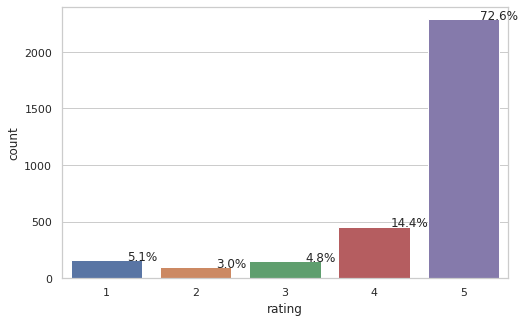

In [8]:
#exploring of "rating" Variable
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(data))
ax = sns.countplot(x="rating", data=data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [9]:
#  data's categories
categories= pd.DataFrame(data['rating'].apply(lambda x: 1 if (x > 3) else 0) ).to_numpy()
categories

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [11]:
#create new  column called sentiment and store the pos for rate over 3 and negaive for the rest 
data['sentiment']= data['rating'].apply(lambda x: "Positive" if (x > 3) else "Negative") 
data.head(10)

,rating,date,variation,verified_reviews,feedback,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Positive
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,Positive
4,5,31-Jul-18,Charcoal Fabric,Music,1,Positive
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,Positive
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,Negative
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,Positive
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,Positive
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,Positive


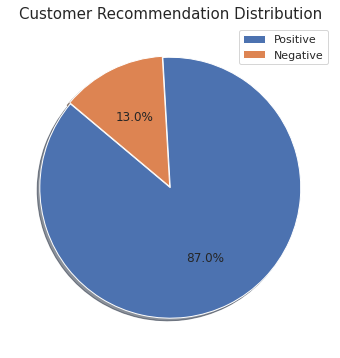

In [12]:
plt.figure(figsize=(6, 6))

explode = [0, 0.01]
plt.pie(data['sentiment'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['Positive', 'Negative'])
plt.title('Customer Recommendation Distribution', fontsize=15)
plt.axis('off');

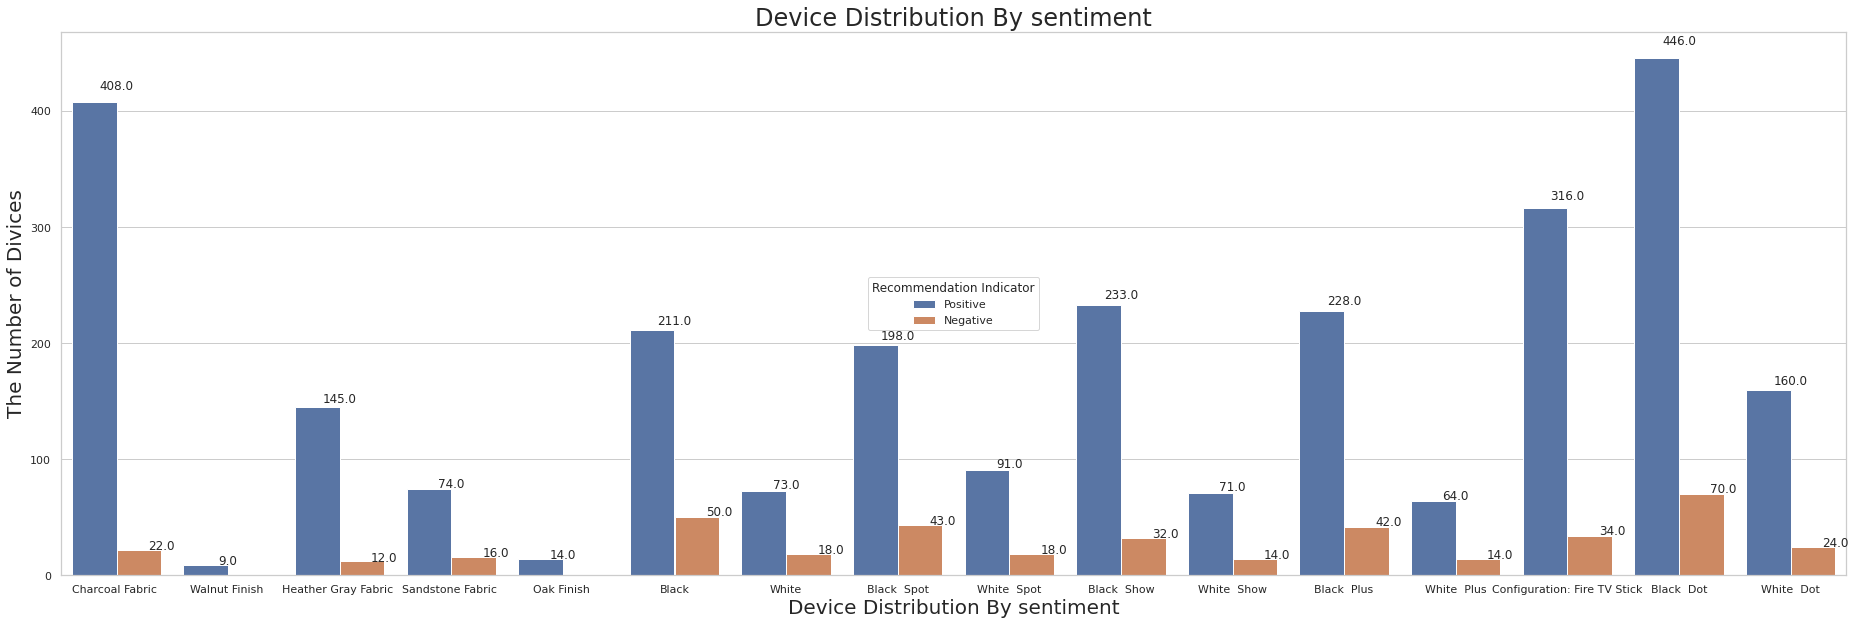

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(32,10))
total = float(len(data))
ax = sns.countplot(x="variation", hue = "sentiment", data=data)

plt.title('Device Distribution By sentiment', fontsize=24)
plt.xlabel("Device Distribution By sentiment", fontsize=20)
plt.ylabel("The Number of Divices", fontsize=20)
plt.legend(title='Recommendation Indicator', loc='center', labels=['Positive', 'Negative'])

for p in ax.patches:        
   # percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()* 1.025
    ax.annotate(p.get_height(), (x, y),ha='center')

plt.show()

In [14]:
# count the number of different type of devices
data["variation"].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

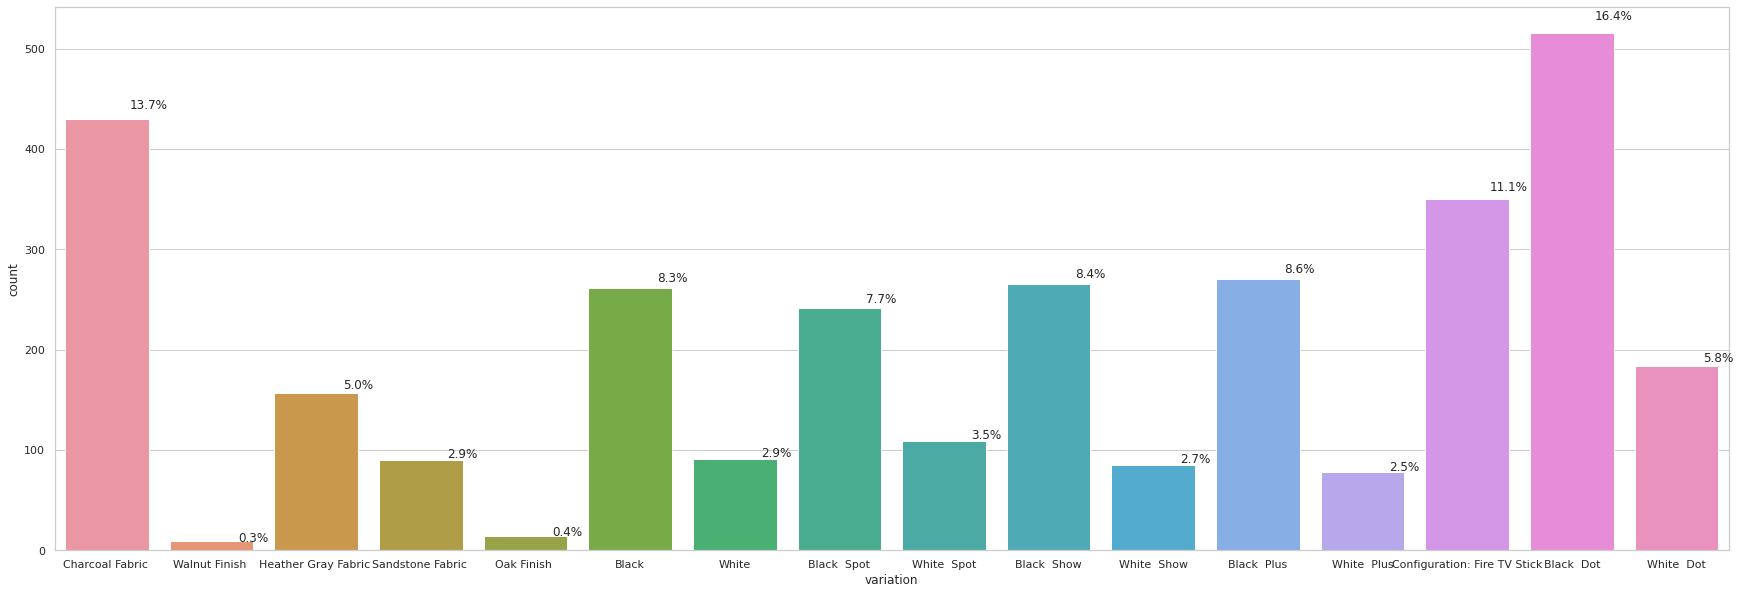

In [15]:
#exploring of "variation" Variable
sns.set(style="whitegrid")
plt.figure(figsize=(30,10))
total = float(len(data))
ax = sns.countplot(x="variation", data=data)
for p in ax.patches:        
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()* 1.025
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [16]:
data["feedback"].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

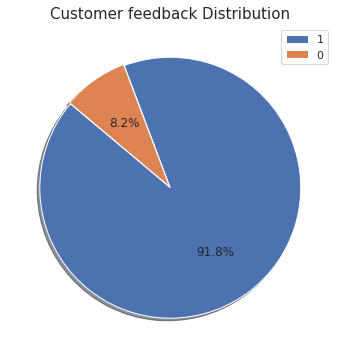

In [17]:
plt.figure(figsize=(6, 6))
explode = [0, 0.01]
plt.pie(data['feedback'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['1', '0'])
plt.title('Customer feedback Distribution', fontsize=15)
plt.axis('off');

In [18]:
data.drop(["rating",	"date"	,"variation"	,"feedback"], axis=1, inplace=True)
data

,verified_reviews,sentiment
0,Love my Echo!,Positive
1,Loved it!,Positive
2,"Sometimes while playing a game, you can answer...",Positive
3,I have had a lot of fun with this thing. My 4 ...,Positive
4,Music,Positive
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",Positive
3146,"Listening to music, searching locations, check...",Positive
3147,"I do love these things, i have them running my...",Positive
3148,Only complaint I have is that the sound qualit...,Positive


In [19]:
# create lemmatizer 
lemmatizer = WordNetLemmatizer()
# function to get the simpler virsion of pos tag  to use  in lemmitazation 
def get_simple_pos(tag):
    if tag.startswith('N') or tag.startswith('J'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN #default case

In [20]:
# function to clear the reviews from email addresses,URLs,numbers,stopwords patterns and lemmitize the reviews 
def clean_reviews(review):
    clean_words=[]
    # Remove email addresses patterns 
    raw_review = re.sub('\b[\w\-.]+?@\w+?\w+?\.\w{2,4}\b'," ",review)
    # Remove URLs  patterns
    raw_review =re.sub("[^a-zA-Z]"," ",raw_review)
    #Remove numbers
    raw_review= re.sub("\d+(\.\d+)?"," ",raw_review)

    stop_words=set(stopwords.words("english"))
    words_tokens= nltk.word_tokenize(raw_review)  
    for word in words_tokens :

      if word.lower() not in stop_words:
        pos = pos_tag([word]) # get the part of speech of each word 
    
        clean_word=(lemmatizer.lemmatize(word.lower(), pos=get_simple_pos(tag)) for word, tag in pos)
        clean_words.append("".join(clean_word))

    return (" ".join(clean_words))


In [29]:
# store the cleaned reviews inside clean_reviews_corpus array 
clean_reviews_corpus=[]

for index,review in enumerate(data["verified_reviews"]):
  clean_reviews_corpus.append(clean_reviews(data["verified_reviews"][index]))
data["verified_reviews"] = data["verified_reviews"].apply(clean_reviews)
data["verified_reviews"].head()

0                                            love echo
1                                                 love
2    sometimes play game answer question correctly ...
3    lot fun thing yr old learns dinosaur control l...
4                                                music
Name: verified_reviews, dtype: object

In [30]:
data.head()

,verified_reviews,sentiment
0,love echo,Positive
1,love,Positive
2,sometimes play game answer question correctly ...,Positive
3,lot fun thing yr old learns dinosaur control l...,Positive
4,music,Positive


In [31]:
# review 5 cleaned  
print("review 5 cleaned {",data["verified_reviews"][5],"}")

review 5 cleaned { receive echo gift need another bluetooth something play music easily accessible found smart speaker wait see else }


In [32]:
words_values = pd.Series(" ".join(data["verified_reviews"]).split()).value_counts()
print(words_values)
rare_words=words_values[words_values <= 3]
print(rare_words)
print(rare_words.value_counts())

love         1063
echo          868
great         729
use           662
work          650
             ... 
pulse           1
hi              1
specially       1
grows           1
iot             1
Length: 3121, dtype: int64
woofer       3
flicker      3
com          3
mood         3
geek         3
            ..
pulse        1
hi           1
specially    1
grows        1
iot          1
Length: 1957, dtype: int64
1    1123
2     587
3     247
dtype: int64


In [33]:
data["verified_reviews"] = data["verified_reviews"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
data["verified_reviews"].head(10)

0                                            love echo
1                                                 love
2    sometimes play game answer question correctly ...
3    lot fun thing yr old learns control light play...
4                                                music
5    receive echo gift need another bluetooth somet...
6    without use many feature ipad see use great al...
7    think th one purchase work get one every room ...
8                                           look great
9    love listen song heard since get news weather ...
Name: verified_reviews, dtype: object

In [34]:
# Create function to display wordcload
def create_WordCloud(data, back_ground_color="black",title= None):
  wordcloud=WordCloud(background_color=back_ground_color, max_words=300, max_font_size=30 , scale=3,random_state=1).generate(str(data))
  mpl.rcParams['figure.figsize']=(15,15) 
  mpl.rcParams['font.size']=20  
  #plt.style.use('fast')
  fig = plt.figure(1)
  if title:
    plt.title(title, fontsize= 30)

  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

In [35]:
# seprate the pos and neg words 
#Negative_words = " ".join(data[data["verified_reviews"]  =="0"]in categories).split()
Negative_words =[]
Positive_words=[]


#clean_reviews(data["verified_reviews"][index]
for index,num  in enumerate (categories):
    if num == 1:
        Positive_words.append(data["verified_reviews"][index])
    else :
        Negative_words.append(data["verified_reviews"][index])

In [36]:
Negative_words[:20]

['without use many feature ipad see use great alarm u almost hear alarm bedroom living room reason enough keep fun ask random question hear response seem yet',
 'get second unit bedroom expect sound improve didnt really see difference overall big improvement st generation',
 'speaker sound pretty good small setup pretty easy bought two reason rate follow instruction music unit know do correctly sync purchasing multiple unit',
 'like siri fact siri answer alexa see real need household though good prime day deal',
 'different apple play specific list music must amazon spotify plus prime etc account must pay play music star reason everything else',
 'like google well',
 'sound terrible u want good music get bose',
 'much feature',
 'annoy everything show alexa able download spend much time try figure machine may well look',
 'know half thing ask recognize wifi even though product detail say compatible program change wifi thermostat setting match wifi router handy music player amazon music

In [37]:
Positive_words[:20]

['love echo',
 'love',
 'sometimes play game answer question correctly alexa say get wrong answer like able turn light away home',
 'lot fun thing yr old learns control light play game like nice sound play music well',
 'music',
 'receive echo gift need another bluetooth something play music easily found smart speaker wait see else',
 'think th one purchase work get one every room house really like feature offer play music echo control light throughout house',
 'look great',
 'love listen song heard since get news weather information great',
 'sent year old dad talk constantly',
 'love learn knew thing still figure everything work far easy use understand make laugh time',
 'purchase mother problem give something try come get around fast like enjoys little big thing alexa play song time cook',
 'love love love',
 'expect',
 'love wife hate',
 'really happy purchase great speaker easy set',
 'use alexa couple day lot fun new toy like new household member try learn different benefit come'

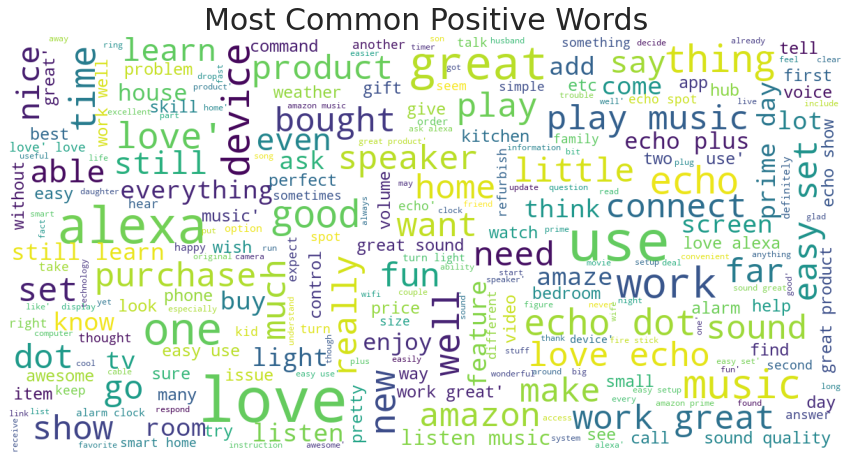

In [38]:
# wordcload for positive words 
create_WordCloud(Positive_words,back_ground_color="white",title="Most Common Positive Words")


In [39]:
# Top 15 words are in positive reviews
freq_pos=nltk.FreqDist(Positive_words)
freq_pos.most_common(15)


[('love', 89),
 ('', 63),
 ('work great', 21),
 ('great product', 19),
 ('great', 14),
 ('easy set', 13),
 ('like', 12),
 ('love everything', 8),
 ('love echo', 7),
 ('really like', 7),
 ('love love love', 6),
 ('expect', 6),
 ('love alexa', 6),
 ('amaze', 6),
 ('absolutely love', 6)]

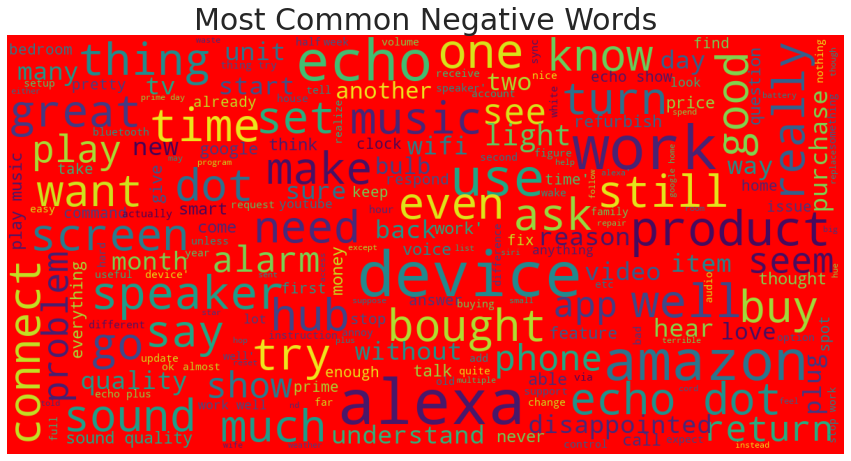

In [40]:
# wordcload for negative words 
create_WordCloud(Negative_words,back_ground_color="red",title="Most Common Negative Words")

In [41]:
# Top 15 words are in negative reviews
freq_neg=nltk.FreqDist(Negative_words)
freq_neg.most_common(10)

[('', 33),
 ('speaker could well', 4),
 ('without use many feature ipad see use great alarm u almost hear alarm bedroom living room reason enough keep fun ask random question hear response seem yet',
  2),
 ('get second unit bedroom expect sound improve didnt really see difference overall big improvement st generation',
  2),
 ('speaker sound pretty good small setup pretty easy bought two reason rate follow instruction music unit know do correctly sync purchasing multiple unit',
  2),
 ('like siri fact siri answer alexa see real need household though good prime day deal',
  2),
 ('different apple play specific list music must amazon spotify plus prime etc account must pay play music star reason everything else',
  2),
 ('like google well', 2),
 ('sound terrible u want good music get bose', 2),
 ('much feature', 2)]

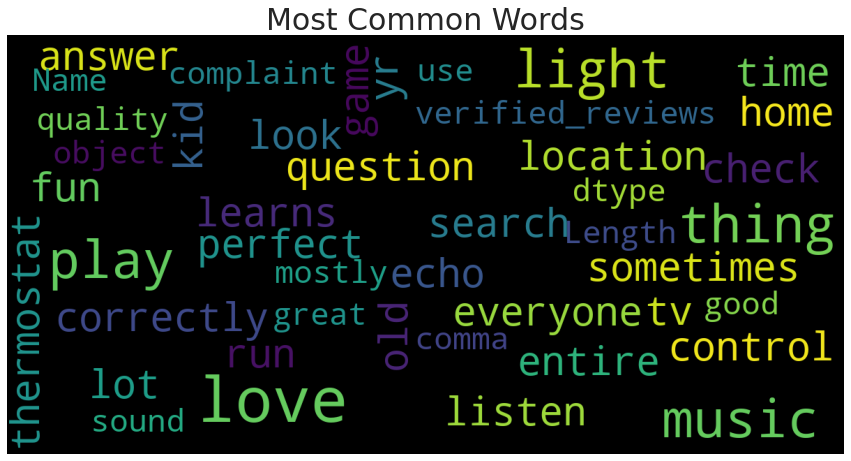

In [42]:
# wordcload for all words 
create_WordCloud(data["verified_reviews"],title="Most Common Words")

In [43]:
# Top 15 words  in reviews
freq_allwords=nltk.FreqDist(data["verified_reviews"])
freq_allwords.most_common(15)

[('', 96),
 ('love', 89),
 ('work great', 21),
 ('great product', 19),
 ('great', 14),
 ('easy set', 13),
 ('like', 12),
 ('love everything', 8),
 ('love echo', 7),
 ('good', 7),
 ('really like', 7),
 ('love love love', 6),
 ('expect', 6),
 ('love alexa', 6),
 ('amaze', 6)]

In [44]:
x_train , x_test , y_train , y_test = train_test_split(data["verified_reviews"] ,categories,stratify=categories, test_size= 0.20,random_state=42)

In [45]:
# here we create new CountVectorizer, which will help us understand and count the words.and it has different ways to use it, but we will only use it with  2-3 gram 
count_vec= CountVectorizer(ngram_range=(1,2))
# vectorizer to read the train text for us
x_train_features= count_vec.fit_transform(x_train)
x_train_features = x_train_features.toarray() #to get the frequincy of the words 
# print the features in count vectorizer with 2 -3 combination of words
print(count_vec.get_feature_names())

['ability', 'ability adjust', 'ability alexa', 'ability contact', 'ability control', 'ability create', 'ability day', 'ability example', 'ability fall', 'ability listen', 'ability make', 'ability multiple', 'ability music', 'ability night', 'ability play', 'ability respond', 'ability see', 'ability shopping', 'ability talk', 'able', 'able access', 'able add', 'able alexa', 'able answer', 'able bonus', 'able buy', 'able completely', 'able connect', 'able contact', 'able control', 'able download', 'able easily', 'able follow', 'able get', 'able hear', 'able hook', 'able idea', 'able install', 'able instruction', 'able link', 'able listen', 'able make', 'able manage', 'able name', 'able play', 'able put', 'able read', 'able see', 'able set', 'able shout', 'able start', 'able sync', 'able talk', 'able tell', 'able turn', 'able use', 'able voice', 'able watch', 'absolutely', 'absolutely amaze', 'absolutely everything', 'absolutely great', 'absolutely love', 'absolutely response', 'accent', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
x_train_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [47]:
x_test_features=count_vec.transform(x_test)

In [48]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_Tfid = tfidf_vectorizer.fit_transform(x_train)
X_test_Tfid = tfidf_vectorizer.transform(x_test)
tfidf_vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['ability',
 'ability adjust',
 'ability alexa',
 'ability contact',
 'ability control',
 'ability create',
 'ability day',
 'ability example',
 'ability fall',
 'ability listen',
 'ability make',
 'ability multiple',
 'ability music',
 'ability night',
 'ability play',
 'ability respond',
 'ability see',
 'ability shopping',
 'ability talk',
 'able',
 'able access',
 'able add',
 'able alexa',
 'able answer',
 'able bonus',
 'able buy',
 'able completely',
 'able connect',
 'able contact',
 'able control',
 'able download',
 'able easily',
 'able follow',
 'able get',
 'able hear',
 'able hook',
 'able idea',
 'able install',
 'able instruction',
 'able link',
 'able listen',
 'able make',
 'able manage',
 'able name',
 'able play',
 'able put',
 'able read',
 'able see',
 'able set',
 'able shout',
 'able start',
 'able sync',
 'able talk',
 'able tell',
 'able turn',
 'able use',
 'able voice',
 'able watch',
 'absolutely',
 'absolutely amaze',
 'absolutely everything',
 'absolutely

In [49]:
X_train_Tfid.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
# import confusion_matrix from github 
from Helper_functions import make_confusion_matrix 

In [52]:
# create MultinomialNB object 
mnb_count = MultinomialNB()
# fit on x_train and y_train
mnb_count.fit(x_train_features,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

Accuracy:90.48
F1 score:69.62
Recall:64.45
Precision:91.35
roc_auc_score:64.45

 clasification report:
               precision    recall  f1-score   support

           0       0.92      0.29      0.44        82
           1       0.90      1.00      0.95       548

    accuracy                           0.90       630
   macro avg       0.91      0.64      0.70       630
weighted avg       0.91      0.90      0.88       630


 confussion matrix:
 None


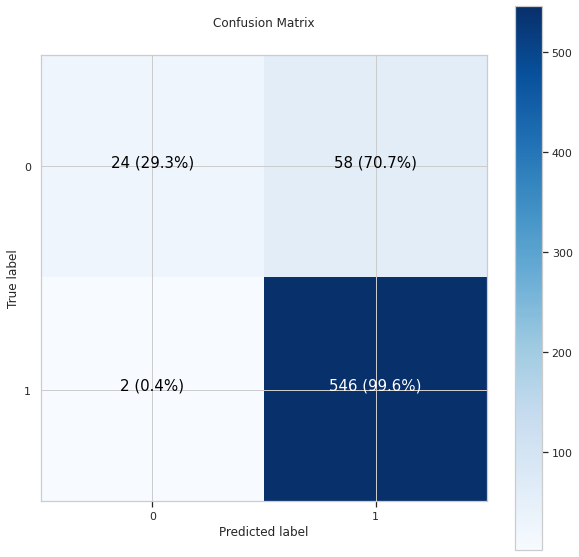

In [53]:
model_score = {}

# get the score of the model 
y_pred_mnb_count = mnb_count.predict(x_test_features)
scores1=round(accuracy_score(y_test,y_pred_mnb_count)*100,2)
print ("Accuracy:{}".format(scores1))
scores2=round(f1_score(y_test,y_pred_mnb_count, average='macro')*100,2)
print ("F1 score:{}".format(scores2))
scores3=round(recall_score(y_test,y_pred_mnb_count, average='macro')*100,2)
print ("Recall:{}".format(scores3))
scores4=round(precision_score(y_test,y_pred_mnb_count, average='macro')*100,2)
print ("Precision:{}".format(scores4))
scores5=round(roc_auc_score(y_test,y_pred_mnb_count, average='macro')*100,2)
print ("roc_auc_score:{}".format(scores5)) 
print ('\n clasification report:\n', classification_report(y_test,y_pred_mnb_count))
print ('\n confussion matrix:\n',make_confusion_matrix(y_test, y_pred_mnb_count))
model_score["Naive Bayes with count vectorizer"] = [scores1, scores2,  scores3,scores4,scores5]

In [54]:
# custom reviews will be use later to compare the models 
review_1 = 'Its not like Siri, Siri answers more accurately then Alexa.'
review_2="i think siri device is better . this device is useless "
review_3=" I’ve have Echoes all over the house...I didn't have any problem"
review_4="I like it very much! Thank you for great quality product with cheaper price!"
review_5="Love it! Just takes some time to configure it but it is fabulous! Thank you!"
review_6="when i give any command Alexa goes on search mode and minewhile it also gets the sorrounding sound and Alexa belives it as it's command.. So finally the search result is Nothing"
reviews=[review_1,review_2,review_3,review_4,review_5,review_6]

In [55]:
results={}
preds=[]
for ind ,review in enumerate(reviews) :
    review = clean_reviews(review)
    text_count=count_vec.transform([review]).toarray()
    prediction= mnb_count.predict(text_count)
    if (np.round(prediction,2) >= 0.5):
        pred = "Positive"

    else:
        pred = "Negative"
    preds+=[pred]
results["Naive Bayes with count vectorizer"] =preds

In [56]:
# create MultinomialNB object 
mnb_Tfid = MultinomialNB()
# fit on x_train and y_train
mnb_Tfid.fit(X_train_Tfid, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

Accuracy:86.98
F1 score:46.52
Recall:50.0
Precision:43.49
roc_auc_score:50.0

 clasification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.87      1.00      0.93       548

    accuracy                           0.87       630
   macro avg       0.43      0.50      0.47       630
weighted avg       0.76      0.87      0.81       630



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: 


 confussion matrix:
 None


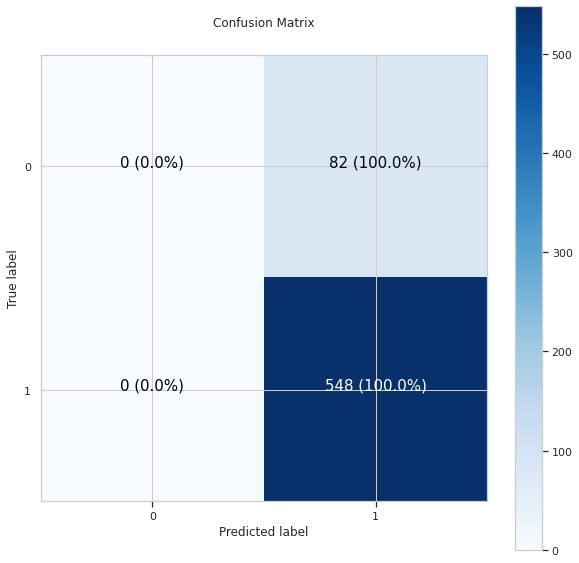

In [57]:
# Get the predicited probability of testing data
y_pred_Tfid_mnb = mnb_Tfid.predict(X_test_Tfid)
scores1=round(accuracy_score(y_test,y_pred_Tfid_mnb)*100,2)
print ("Accuracy:{}".format(scores1))
scores2=round(f1_score(y_test,y_pred_Tfid_mnb, average='macro')*100,2)
print ("F1 score:{}".format(scores2))
scores3=round(recall_score(y_test,y_pred_Tfid_mnb, average='macro')*100,2)
print ("Recall:{}".format(scores3))
scores4=round(precision_score(y_test,y_pred_Tfid_mnb, average='macro')*100,2)
print ("Precision:{}".format(scores4))
scores5=round(roc_auc_score(y_test,y_pred_Tfid_mnb, average='macro')*100,2)
print ("roc_auc_score:{}".format(scores5)) 
print ('\n clasification report:\n', classification_report(y_test,y_pred_Tfid_mnb))
print ('\n confussion matrix:\n',make_confusion_matrix(y_test, y_pred_Tfid_mnb))
model_score["Naive Bayes with TF-IDF vectorizer"] = [scores1, scores2,  scores3,scores4,scores5]

In [58]:
preds=[]
for ind ,review in enumerate(reviews) :
    review = clean_reviews(review)
    text_tfidf=tfidf_vectorizer.transform([review]).toarray()
    prediction= mnb_Tfid.predict(text_count)
    if (np.round(prediction,2) >= 0.5):
        pred = "Positive"

    else:
        pred = "Negative"
    preds+=[pred]
results["Naive Bayes with TF-IDF Vectorizer"] =preds


In [59]:
svc_count = LinearSVC( class_weight="balanced")

svc_count.fit(x_train_features,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(class_weight='balanced')

Accuracy:89.84
F1 score:78.66
recall:80.16
Precision:77.38
roc_auc_score:80.16

 clasification report:
               precision    recall  f1-score   support

           0       0.60      0.67      0.63        82
           1       0.95      0.93      0.94       548

    accuracy                           0.90       630
   macro avg       0.77      0.80      0.79       630
weighted avg       0.90      0.90      0.90       630


 confussion matrix:
 None


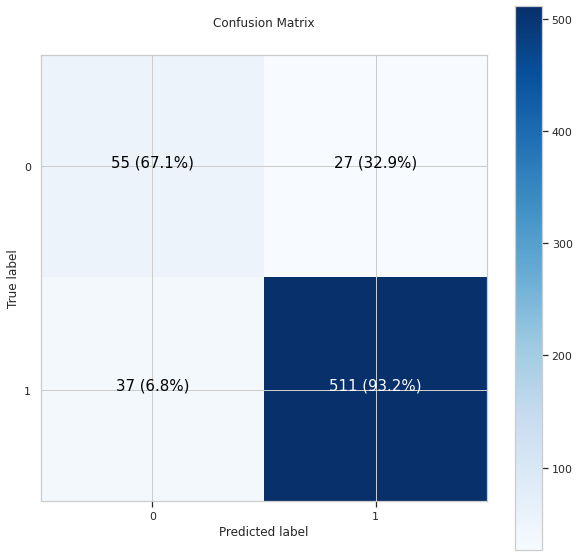

In [60]:
y_pred_count_svc = svc_count.predict(x_test_features)
scores1=round(accuracy_score(y_pred_count_svc,y_test)*100,2)
print ("Accuracy:{}".format(scores1))
scores2=round(f1_score(y_pred_count_svc,y_test, average='macro')*100,2)
print ("F1 score:{}".format(scores2))
scores3=round(recall_score(y_test,y_pred_count_svc, average='macro')*100,2)
print ("recall:{}".format(scores3))
scores4=round(precision_score(y_test,y_pred_count_svc, average='macro')*100,2)
print ("Precision:{}".format(scores4))
scores5=round(roc_auc_score(y_test,y_pred_count_svc, average='macro')*100,2)
print ("roc_auc_score:{}".format(scores5)) 
print ('\n clasification report:\n', classification_report(y_test,y_pred_count_svc))
print ('\n confussion matrix:\n',make_confusion_matrix(y_test, y_pred_count_svc))
model_score["Support Vector Machine with Count Vectorizor"] = [scores1, scores2,  scores3,scores4,scores5]

In [61]:
preds=[]
for ind ,review in enumerate(reviews) :
    review = clean_reviews(review)
    text_count=count_vec.transform([review]).toarray()
    prediction= svc_count.predict(text_count)
    if (np.round(prediction,2) >= 0.5):
        pred = "Positive"

    else:
        pred = "Negative"
    preds+=[pred]
results["SVM with Count Vectorizor"] =preds

In [62]:
svc_Tfid = LinearSVC( class_weight="balanced")

svc_Tfid.fit(X_train_Tfid, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(class_weight='balanced')

Accuracy:91.75
F1 score:81.77
recall:81.77
Precision:81.77
roc_auc_score:81.77

 clasification report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68        82
           1       0.95      0.95      0.95       548

    accuracy                           0.92       630
   macro avg       0.82      0.82      0.82       630
weighted avg       0.92      0.92      0.92       630


 confussion matrix:
 None


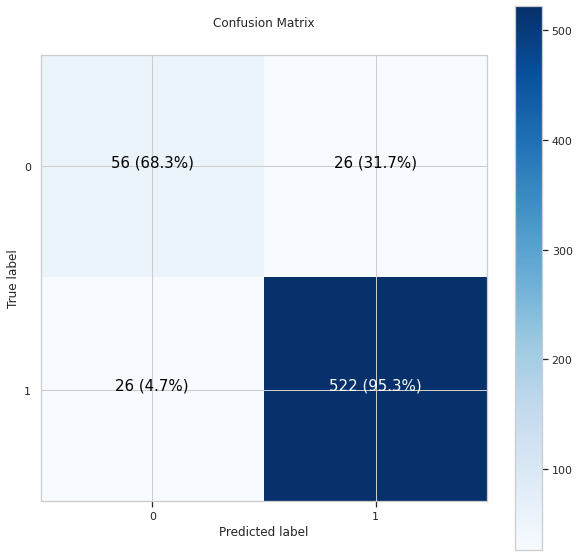

In [63]:
y_pred_Tfid_svc = svc_Tfid.predict(X_test_Tfid)
scores1=round(accuracy_score(y_test,y_pred_Tfid_svc)*100,2)
print ("Accuracy:{}".format(scores1))
scores2=round(f1_score(y_test,y_pred_Tfid_svc, average='macro')*100,2)
print ("F1 score:{}".format(scores2))
scores3=round(recall_score(y_test,y_pred_Tfid_svc, average='macro')*100,2)
print ("recall:{}".format(scores3))
scores4=round(precision_score(y_test,y_pred_Tfid_svc, average='macro')*100,2)
print ("Precision:{}".format(scores4))
scores5=round(roc_auc_score(y_test,y_pred_Tfid_svc, average='macro')*100,2)
print ("roc_auc_score:{}".format(scores5)) 
print ('\n clasification report:\n', classification_report(y_test,y_pred_Tfid_svc))
print ('\n confussion matrix:\n',make_confusion_matrix(y_test, y_pred_Tfid_svc))
model_score["Support Vector Machine with TF-IDF Vectorizer "] = [scores1, scores2,  scores3,scores4,scores5]

In [64]:
preds=[]
for ind ,review in enumerate(reviews) :
    review = clean_reviews(review)
    text_count=tfidf_vectorizer.transform([review]).toarray()
    prediction= svc_Tfid.predict(text_count)
    if (np.round(prediction,2) >= 0.5):
        pred = "Positive"

    else:
        pred = "Negative"
    preds+=[pred]
results["SVM with TF-IDF Vectorizer"] =preds

In [65]:
# We'll use 100 weak learners to build a strong learner and using DecisionTreeClassifier as base estimtor
adaboost_classifier_count = AdaBoostClassifier(n_estimators=100,base_estimator=DecisionTreeClassifier() )

adaboost_classifier_count.fit(x_train_features,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

Accuracy:91.27
F1 score:74.48
Recall:69.06
Precision:89.03
roc_auc_score:69.06

 clasification report:
               precision    recall  f1-score   support

           0       0.86      0.39      0.54        82
           1       0.92      0.99      0.95       548

    accuracy                           0.91       630
   macro avg       0.89      0.69      0.74       630
weighted avg       0.91      0.91      0.90       630


 confussion matrix:
 None


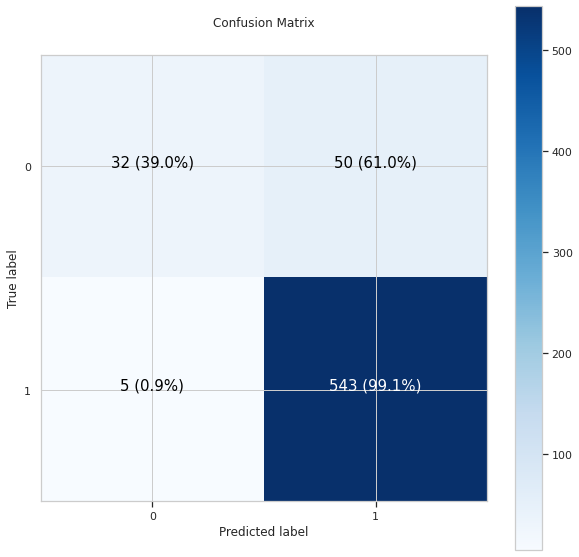

In [66]:
y_pred_count_adaboost = adaboost_classifier_count.predict(x_test_features)
scores1=round(accuracy_score(y_test,y_pred_count_adaboost)*100,2)
print ("Accuracy:{}".format(scores1))
scores2=round(f1_score(y_test,y_pred_count_adaboost, average='macro')*100,2)
print ("F1 score:{}".format(scores2))
scores3=round(recall_score(y_test,y_pred_count_adaboost, average='macro')*100,2)
print ("Recall:{}".format(scores3))
scores4=round(precision_score(y_test,y_pred_count_adaboost, average='macro')*100,2)
print ("Precision:{}".format(scores4))
scores5=round(roc_auc_score(y_test,y_pred_count_adaboost, average='macro')*100,2)
print ("roc_auc_score:{}".format(scores5))

print ('\n clasification report:\n', classification_report(y_test,y_pred_count_adaboost))
print ('\n confussion matrix:\n',make_confusion_matrix(y_test, y_pred_count_adaboost))
model_score["AdaBoost with Count Vectorizor"] = [scores1, scores2,  scores3,scores4,scores5]

In [67]:
preds=[]
for ind ,review in enumerate(reviews) :
    review = clean_reviews(review)
    text_count=count_vec.transform([review]).toarray()
    prediction= adaboost_classifier_count.predict(text_count)
    if (np.round(prediction,2) >= 0.5):
        pred = "Positive"

    else:
        pred = "Negative"
    preds+=[pred]
results["adaboost with count Vectorizer"] =preds

In [68]:
# We'll use 100 weak learners to build a strong learner
adaboost_classifier_Tfid = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100)

adaboost_classifier_Tfid.fit(X_train_Tfid,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

Accuracy:90.16
F1 score:72.66
Recall:68.42
Precision:82.1
roc_auc_score:68.42

 clasification report:
               precision    recall  f1-score   support

           0       0.73      0.39      0.51        82
           1       0.91      0.98      0.95       548

    accuracy                           0.90       630
   macro avg       0.82      0.68      0.73       630
weighted avg       0.89      0.90      0.89       630


 confussion matrix:
 None


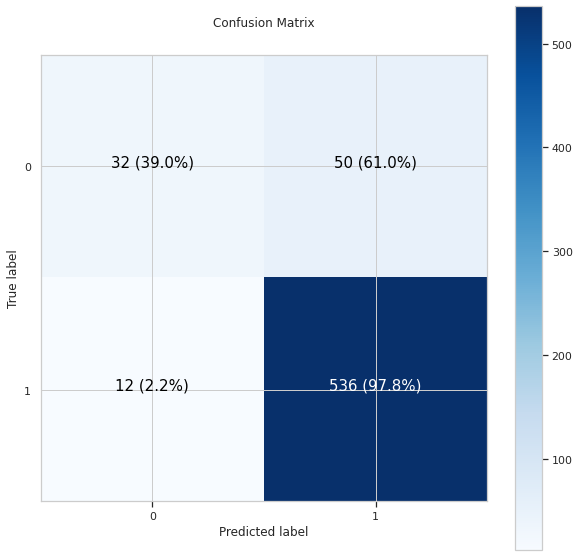

In [69]:
y_pred_Tfid_adaboost = adaboost_classifier_Tfid.predict(X_test_Tfid)
scores1=round(accuracy_score(y_test,y_pred_Tfid_adaboost)*100,2)
print ("Accuracy:{}".format(scores1))
scores2=round(f1_score(y_test,y_pred_Tfid_adaboost ,average='macro')*100,2)
print ("F1 score:{}".format(scores2))
scores3=round(recall_score(y_test,y_pred_Tfid_adaboost, average='macro')*100,2)
print ("Recall:{}".format(scores3))
scores4=round(precision_score(y_test,y_pred_Tfid_adaboost, average='macro')*100,2)
print ("Precision:{}".format(scores4))
scores5=round(roc_auc_score(y_test,y_pred_Tfid_adaboost, average='macro')*100,2)
print ("roc_auc_score:{}".format(scores5))

print ('\n clasification report:\n', classification_report(y_test,y_pred_Tfid_adaboost))
print ('\n confussion matrix:\n',make_confusion_matrix(y_test, y_pred_Tfid_adaboost))
model_score["AdaBoost with TF-IDF Vectorizer "] = [scores1, scores2,  scores3,scores4,scores5]

In [70]:
preds=[]
for ind ,review in enumerate(reviews) :
    review = clean_reviews(review)
    text_count=tfidf_vectorizer.transform([review]).toarray()
    prediction= adaboost_classifier_Tfid.predict(text_count)
    
    if (np.round(prediction,2) >= 0.5):
        pred = "Positive"

    else:
        pred = "Negative"
    preds+=[pred]
results["adaboost with TF-IDF Vectorizer"] =preds

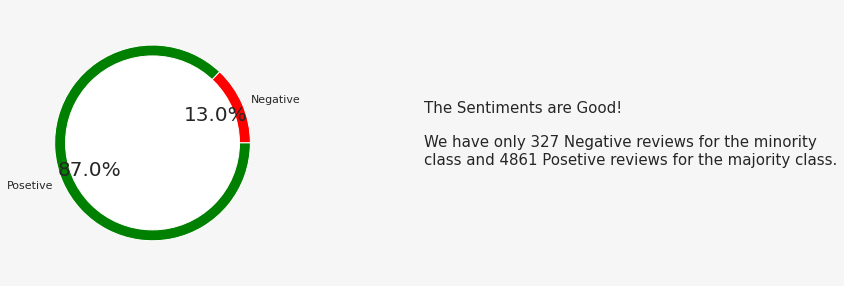

In [73]:
# get the class weight 
fig = plt.figure(figsize=(14,5),facecolor='#f7f6f6',)
axes = plt.subplot2grid((1,1),(0,0))

plt.pie(x = [len(y_train[y_train == 0]), len(y_train[y_train == 1])],
        pctdistance=0.70,labels = ['Negative','Posetive'], autopct='%1.1f%%',
        colors = ['red','green'], labeldistance= 1.1, radius = 0.9,)

centre_circle = plt.Circle((0,0),0.8,fc='white') 

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# plt.tight_layout()
plt.text(2.5,-0.2,f'The Sentiments are Good!\n\nWe have only 327 Negative reviews for the minority \nclass and 4861 Posetive reviews for the majority class.', fontsize=15)
plt.show()

In [74]:
# find the length of the largest sentence in training data
max_len = max(x_train, key = len)
print(f'Max number of words in a text in training data: {len(max_len)}')

Max number of words in a text in training data: 1363


In [75]:
# Convert reviews to padded sequences

#We choose 10000 repeated words in corpus for tokenizing.
max_words = 100000
tokenizer = Tokenizer(num_words = max_words)
# create the vocabulary by fitting on X_train text
tokenizer.fit_on_texts(x_train)
# get the sequence of tokens
xtrain_seq = tokenizer.texts_to_sequences(x_train)
xtest_seq = tokenizer.texts_to_sequences(x_test)
# padding the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=len(max_len))
xtest_pad = sequence.pad_sequences(xtest_seq, maxlen=len(max_len))
word_index = tokenizer.word_index

In [76]:
#get a random example
print('train review num 10:', x_train[9])
print('before padding:', xtrain_seq[9])
print('after padding:', xtrain_pad[9])

train review num 10: love listen song heard since get news weather information great
before padding: [1, 8, 147, 228]
after padding: [  0   0   0 ...   8 147 228]


In [77]:
# data shape after padding
print(xtrain_pad.shape)
print (xtest_pad.shape)
print (y_train.shape)
print (y_test.shape)

(2520, 1363)
(630, 1363)
(2520, 1)
(630, 1)


In [78]:
#creating Word Index
tokenizer.word_index

{'love': 1,
 'echo': 2,
 'great': 3,
 'use': 4,
 'work': 5,
 'alexa': 6,
 'music': 7,
 'like': 8,
 'get': 9,
 'sound': 10,
 'one': 11,
 'dot': 12,
 'device': 13,
 'set': 14,
 'easy': 15,
 'well': 16,
 'play': 17,
 'speaker': 18,
 'product': 19,
 'thing': 20,
 'good': 21,
 'amazon': 22,
 'time': 23,
 'home': 24,
 'show': 25,
 'would': 26,
 'still': 27,
 'new': 28,
 'light': 29,
 'bought': 30,
 'really': 31,
 'prime': 32,
 'make': 33,
 'day': 34,
 'smart': 35,
 'need': 36,
 'ask': 37,
 'purchase': 38,
 'much': 39,
 'also': 40,
 'go': 41,
 'quality': 42,
 'fun': 43,
 'far': 44,
 'learn': 45,
 'want': 46,
 'room': 47,
 'even': 48,
 'listen': 49,
 'connect': 50,
 'turn': 51,
 'say': 52,
 'plus': 53,
 'alarm': 54,
 'house': 55,
 'tv': 56,
 'everything': 57,
 'try': 58,
 'buy': 59,
 'feature': 60,
 'know': 61,
 'screen': 62,
 'spot': 63,
 'voice': 64,
 'video': 65,
 'weather': 66,
 'able': 67,
 'look': 68,
 'could': 69,
 'little': 70,
 'hub': 71,
 'tell': 72,
 'add': 73,
 'nice': 74,
 'think'

In [79]:
#check a random word in the word index
tokenizer.word_index["alexa"]

6

In [80]:
# create the model 
def create_model():
    

        model = tf.keras.models.Sequential([tf.keras.layers.Embedding(max_words, 100, input_length=max_words),
                                        tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'),
                                        tf.keras.layers.MaxPooling1D(pool_size=2),
                                        tf.keras.layers.LSTM(256),
                                        tf.keras.layers.Dense(1, activation='sigmoid')
                                        
                            
                                       
    
           ])

        model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(3e-4), metrics=['accuracy'])
        return model
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100000, 100)       10000000  
                                                                 
 conv1d (Conv1D)             (None, 100000, 32)        6432      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50000, 32)        0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 256)               295936    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 10,302,625
Trainable params: 10,302,625
Non-trainable params: 0
____________________________________________

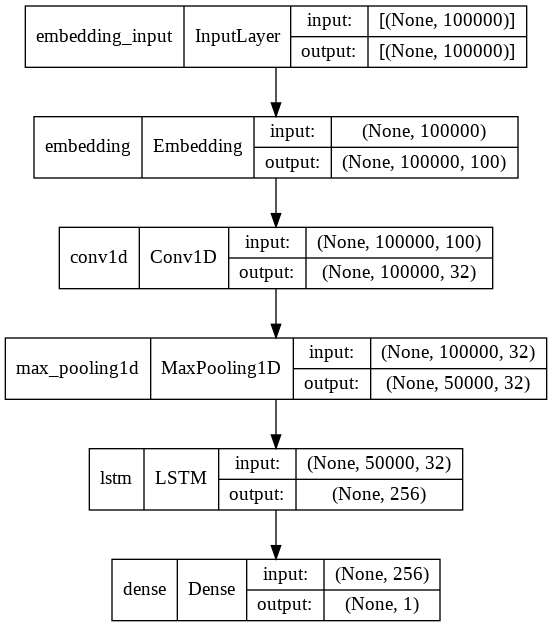

In [81]:
clear_session()
# print the block diagram of our model
plot_model(model, to_file='modelplot.png', show_shapes=True, show_layer_names=True)

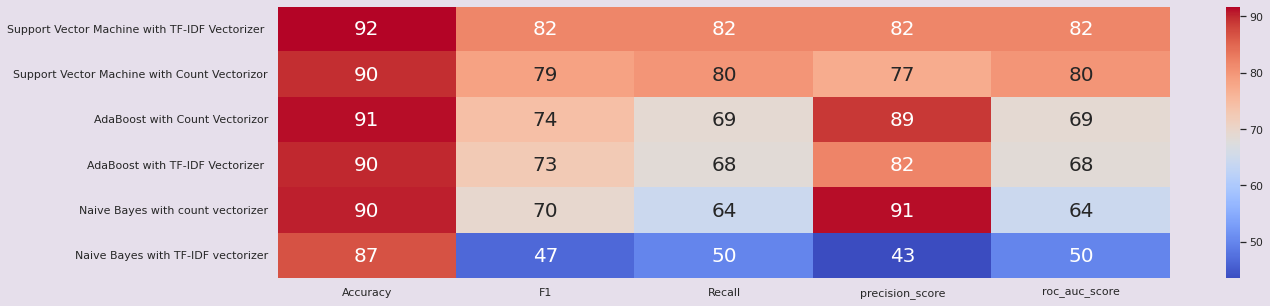

In [86]:
score_df = pd.DataFrame(model_score).transpose()
score_df.rename(columns = {0 :'Accuracy', 1:'F1' , 2: 'Recall', 3:'precision_score' , 4:"roc_auc_score" }, inplace = True)
score_df.sort_values(by = 'roc_auc_score', ascending = False, inplace = True)
fig = plt.figure(figsize=(20,5), facecolor = '#e6dfeb')
axes = plt.subplot2grid((1,1),(0,0))

sns.heatmap(data = score_df, cmap = 'coolwarm', annot = True,)
plt.show()

##  Conclusion 
I tried a few different models in ML and a CNN with LSTM Model , but SVM with TF-IDF Vectorizer proved to be the most effective for this imbalanced dataset. Our model had a ROC AUC score of 0.82, Accuracy of 0.92, F1 of 0.82, Pecision of 0.82, and Recall of 0.82 .More feature engineering and model implementation can be performed to find a better performing model.